In [84]:
import numpy as np
from numpy import nan

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [85]:
data = pd.read_csv('GOOG.csv', date_parser=True)

In [86]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [87]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4090,2020-11-16,1771.699951,1799.069946,1767.689941,1781.380005,1781.380005,1246800
4091,2020-11-17,1776.939941,1785.000000,1767.000000,1770.150024,1770.150024,1147100
4092,2020-11-18,1765.229980,1773.469971,1746.140015,1746.780029,1746.780029,1173500
4093,2020-11-19,1738.380005,1769.589966,1737.005005,1763.920044,1763.920044,1249900
4094,2020-11-20,1765.209961,1774.000000,1741.859985,1742.189941,1742.189941,2313500


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4095 non-null   object 
 1   Open       4095 non-null   float64
 2   High       4095 non-null   float64
 3   Low        4095 non-null   float64
 4   Close      4095 non-null   float64
 5   Adj Close  4095 non-null   float64
 6   Volume     4095 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 224.1+ KB


In [89]:
cc = data.drop(['Date'], axis = 1)
cc = cc.astype('float')
np.isnan(cc).sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [90]:
train = data[data['Date']<'2019-01-01']
test = data[data['Date']>='2019-01-01']

In [91]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [92]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [93]:
train = train.drop(['Adj Close', 'Date'], axis =1)
test = test.drop(['Adj Close', 'Date'], axis =1)

In [94]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
train

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [95]:
test = scaler.transform(test)

## create training & testing sets

In [96]:
window_size = 60

x_train, y_train = [], []


for i in range(window_size, train.shape[0]-window_size):
    x_train.append(train[i-window_size:i])
    y_train.append(train[i, 0]) #we are going to predict 'Open'

x_train, y_train = np.array(x_train), np.array(y_train)

In [97]:
x_train.shape, y_train.shape

((3497, 60, 5), (3497,))

In [98]:
x_test, y_test = [], []


for i in range(window_size, test.shape[0]-window_size):
    x_test.append(test[i-window_size:i])
    y_test.append(test[i, 0]) #we are going to predict 'Open'

x_test, y_test = np.array(x_test), np.array(y_test)

In [99]:
x_test.shape, y_test.shape

((358, 60, 5), (358,))

## build Model

In [100]:
model = Sequential()

model.add(LSTM(units = 200, activation = 'relu', input_shape = (x_train.shape[1], 5)))
model.add(Dropout(0.2))

# model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 120, activation = 'relu'))
# model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [101]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 200)               164800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 165,001
Trainable params: 165,001
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(optimizer='adam', loss='mse')

In [103]:
history = model.fit(x_train, y_train, epochs= 50, batch_size=32)

Train on 3497 samples
Epoch 1/50
3497/3497 [==============================] - 5s 1ms/sample - loss: 0.0048
Epoch 2/50
3497/3497 [==============================] - 4s 1ms/sample - loss: 9.6630e-04
Epoch 3/50
3497/3497 [==============================] - 4s 1ms/sample - loss: 8.5289e-04
Epoch 4/50
3497/3497 [==============================] - 4s 1ms/sample - loss: 8.2665e-04
Epoch 5/50
3497/3497 [==============================] - 4s 1ms/sample - loss: 7.1279e-04
Epoch 6/50
3497/3497 [==============================] - 4s 1ms/sample - loss: 7.3215e-04
Epoch 7/50
3497/3497 [==============================] - 4s 1ms/sample - loss: 6.3219e-04
Epoch 8/50
3497/3497 [==============================] - 4s 1ms/sample - loss: 6.2510e-04
Epoch 9/50
3497/3497 [==============================] - 4s 1ms/sample - loss: 6.1020e-04 0s - los
Epoch 10/50
3497/3497 [==============================] - 4s 1ms/sample - loss: 5.7505e-04
Epoch 11/50
3497/3497 [==============================] - 4s 1ms/sample - loss: 6.1

In [104]:
history.history

{'loss': [0.004773161352427252,
  0.000966298823696416,
  0.0008528856578564512,
  0.0008266487374038494,
  0.0007127934901966839,
  0.0007321467708137386,
  0.000632185816317846,
  0.0006250981323025249,
  0.0006102026514406722,
  0.0005750515317822113,
  0.0006109386923730114,
  0.0005939422894153645,
  0.0005310861568948298,
  0.000535979276316063,
  0.0004911537501117556,
  0.0005049927606962969,
  0.0005235951176874765,
  0.0004549867975956198,
  0.0004166982038923012,
  0.0004373931347177845,
  0.0004172447977076512,
  0.0004523342520253286,
  0.0004009336274851477,
  0.0004017436732747106,
  0.0004167434612162835,
  0.0004446125875733553,
  0.00040424894908524855,
  0.00041099276587999305,
  0.00041091305188655435,
  0.0003775818385729102,
  0.00035655766862428866,
  0.00037060168645740695,
  0.0003966054826480711,
  0.0004021447329218815,
  0.0004316320109805228,
  0.00033961291007464486,
  0.0003808298158484799,
  0.00036682756070127113,
  0.00031935536832903416,
  0.000363020

In [105]:
y_pred = model.predict(x_test)

In [106]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [111]:
scale = 1/8.18605127e-04





In [112]:
y_pred = y_pred*scale
y_pred

array([[1356169.2],
       [1353315.1],
       [1363748.8],
       [1374010. ],
       [1386499.6],
       [1394616.4],
       [1398386.4],
       [1396116.8],
       [1389334.6],
       [1388319.5],
       [1390038. ],
       [1397135.2],
       [1403425.1],
       [1411898.9],
       [1421086.5],
       [1427546.9],
       [1433118.9],
       [1445997. ],
       [1453978.6],
       [1458405.9],
       [1464540.2],
       [1473032.6],
       [1410032.8],
       [1378107.5],
       [1355107.1],
       [1354693.2],
       [1356458.2],
       [1356689. ],
       [1353911.9],
       [1345941.1],
       [1342083.4],
       [1323344.1],
       [1309797.8],
       [1312980.9],
       [1335624. ],
       [1343318.1],
       [1329129.5],
       [1326232.4],
       [1327075.8],
       [1319789.2],
       [1317016. ],
       [1314200.6],
       [1301161.1],
       [1293397.1],
       [1280166.2],
       [1233900.4],
       [1212814.6],
       [1202075.9],
       [1197681.8],
       [1207260.6],


In [113]:
y_train = y_train*scale
y_train

array([  52356.56067451,   49447.86523458,   47652.75065303, ...,
       1405415.3535817 , 1394506.48713864, 1411657.66117481])

In [114]:
y_test = y_test*scale
y_test

array([1374887.82550266, 1386126.39669726, 1399832.60208249,
       1414687.18043656, 1412805.88388806, 1423861.33504706,
       1415188.07517381, 1400663.34938369, 1406380.45748094,
       1410387.15972582, 1417765.61216988, 1427538.33376199,
       1436089.46515509, 1445862.1867472 , 1453411.68014297,
       1449514.72922635, 1467472.04529393, 1483878.06763256,
       1484672.13180167, 1489839.43391169, 1495947.38490676,
       1387225.85719453, 1390951.76715945, 1366165.65437944,
       1373360.83775389, 1364333.26908092, 1381692.01816689,
       1371357.41272525, 1355501.19515226, 1361071.56949958,
       1334648.56738696, 1328846.01394165, 1305220.50102679,
       1362195.48623264, 1367032.93577872, 1337751.45413448,
       1342625.58681264, 1340500.03208226, 1332865.09333842,
       1341245.1837798 , 1324924.75704483, 1317008.87698703,
       1302374.24961305, 1284966.58927711, 1241245.82841239,
       1213637.91923284, 1224192.47687617, 1216191.00121471,
       1223080.788261  ,

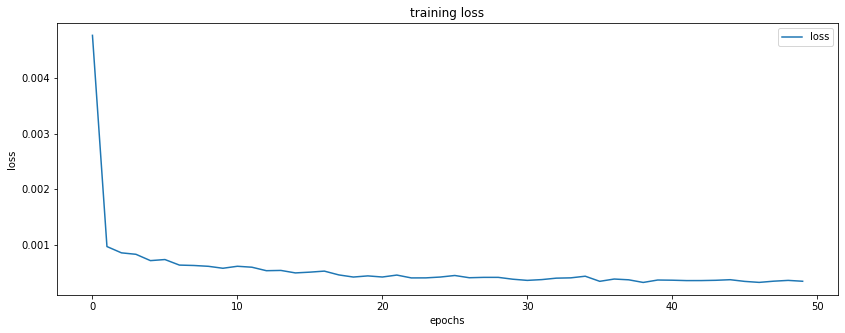

In [116]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(history.history['loss'], label = 'loss')
plt.title('training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

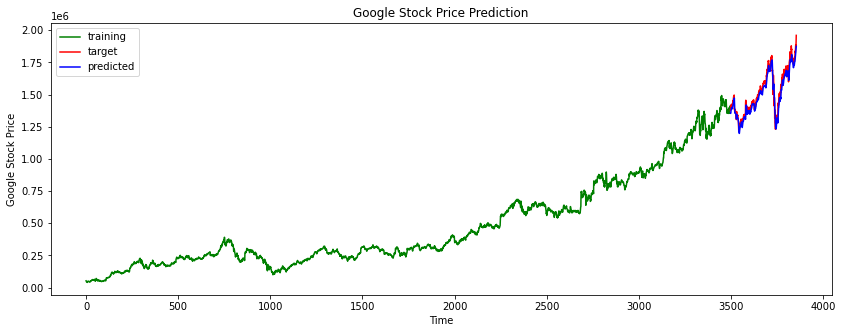

In [118]:
# Visualising the results
train_scale = np.arange(0,len(y_train))
test_scale =  np.arange(len(y_train),len(y_train)+len(y_test))
plt.figure(figsize=(14,5))
plt.plot(train_scale, y_train, color = 'green', label = 'training')
plt.plot(test_scale, y_test, color = 'red', label = 'target')
plt.plot(test_scale, y_pred, color = 'blue', label = 'predicted')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

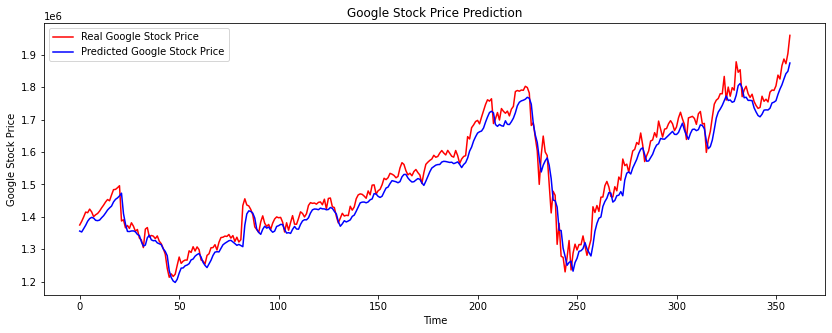

In [119]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()